### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
df = pd.read_csv(r'Leads.csv')

### Inspection of Dataset

In [3]:
# to know the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# to know the shape of dataset / # of rows and # of columns
df.shape

(9240, 37)

In [5]:
# to know the datatypes and null in every columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# for descriptive analysis of the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Cleaning the dataframe (Data Engineering)

**Handling Missing Values**

**Data Preparation ( Cleaning, handling missing values, outliers, Encoding,value_counts, change in format etc.**

In [7]:
# to know how many null values are present in every columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# to know how many null values are present in every columns in terms of percentage
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### **`As we know we can't create a model with null values we need to remove all null values from the dataset`**
##### **`let's start inspecting each column one by one with containing null values`**

In [9]:
df['Country'].value_counts() # 26.63 null values are present in this column so I'am going to replace all nulls into 'Select'

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [10]:
df['Country'].replace(np.nan,'Select', inplace=True)

In [11]:
df['Country'].value_counts()

Country
India                   6492
Select                  2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [12]:
df['Specialization'].replace(np.nan,'Select', inplace=True)  # 15.56 null values are present in this column

In [13]:
df['How did you hear about X Education'].replace(np.nan,'Select', inplace=True)  # 23.89 null values are present in this column

In [14]:
df['What is your current occupation'].replace(np.nan,'Select', inplace=True)  # 29.11 null values are present in this column

In [15]:
df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects', inplace=True)  

# 29.32 null values are present in this column

In [16]:
df['Tags'].replace(np.nan,'No Comments', inplace=True)  # 36.29 null values are present in this column

In [17]:
df['Lead Quality'].replace(np.nan,'Not Sure', inplace=True)  # 51.59 null values are present in this column

In [18]:
df['Lead Profile'].replace(np.nan,'Select', inplace=True)  # 29.32 null values are present in this column

In [19]:
df['City'].replace(np.nan,'Select', inplace=True)  # 15.37 null values are present in this column

In [20]:
# while inspection I found 'Select' is the common value in most of the column thus it is good to replace all null values for every column with 'Select'

In [21]:
round(df.isna().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [22]:
# Removing the columns that are no required and have 45.65% null values

df1 = df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [23]:
round(df1.isna().sum()/len(df1)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [24]:
# Still there is some missing values are present in 4 columns so we can easily drop that rows
df1.dropna(inplace=True)

In [25]:
round(df1.isna().sum()/len(df1)*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

#### Missing values are cleared

### Visualization

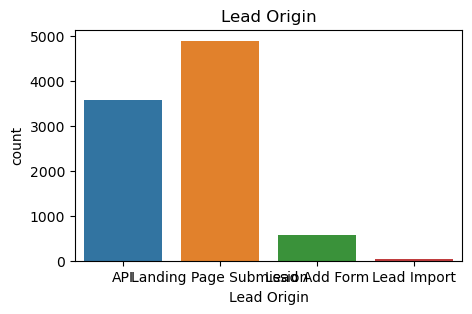

In [26]:
plt.figure(figsize = (5,3))

sns.countplot(x='Lead Origin', data=df1)
plt.title('Lead Origin')
plt.show()

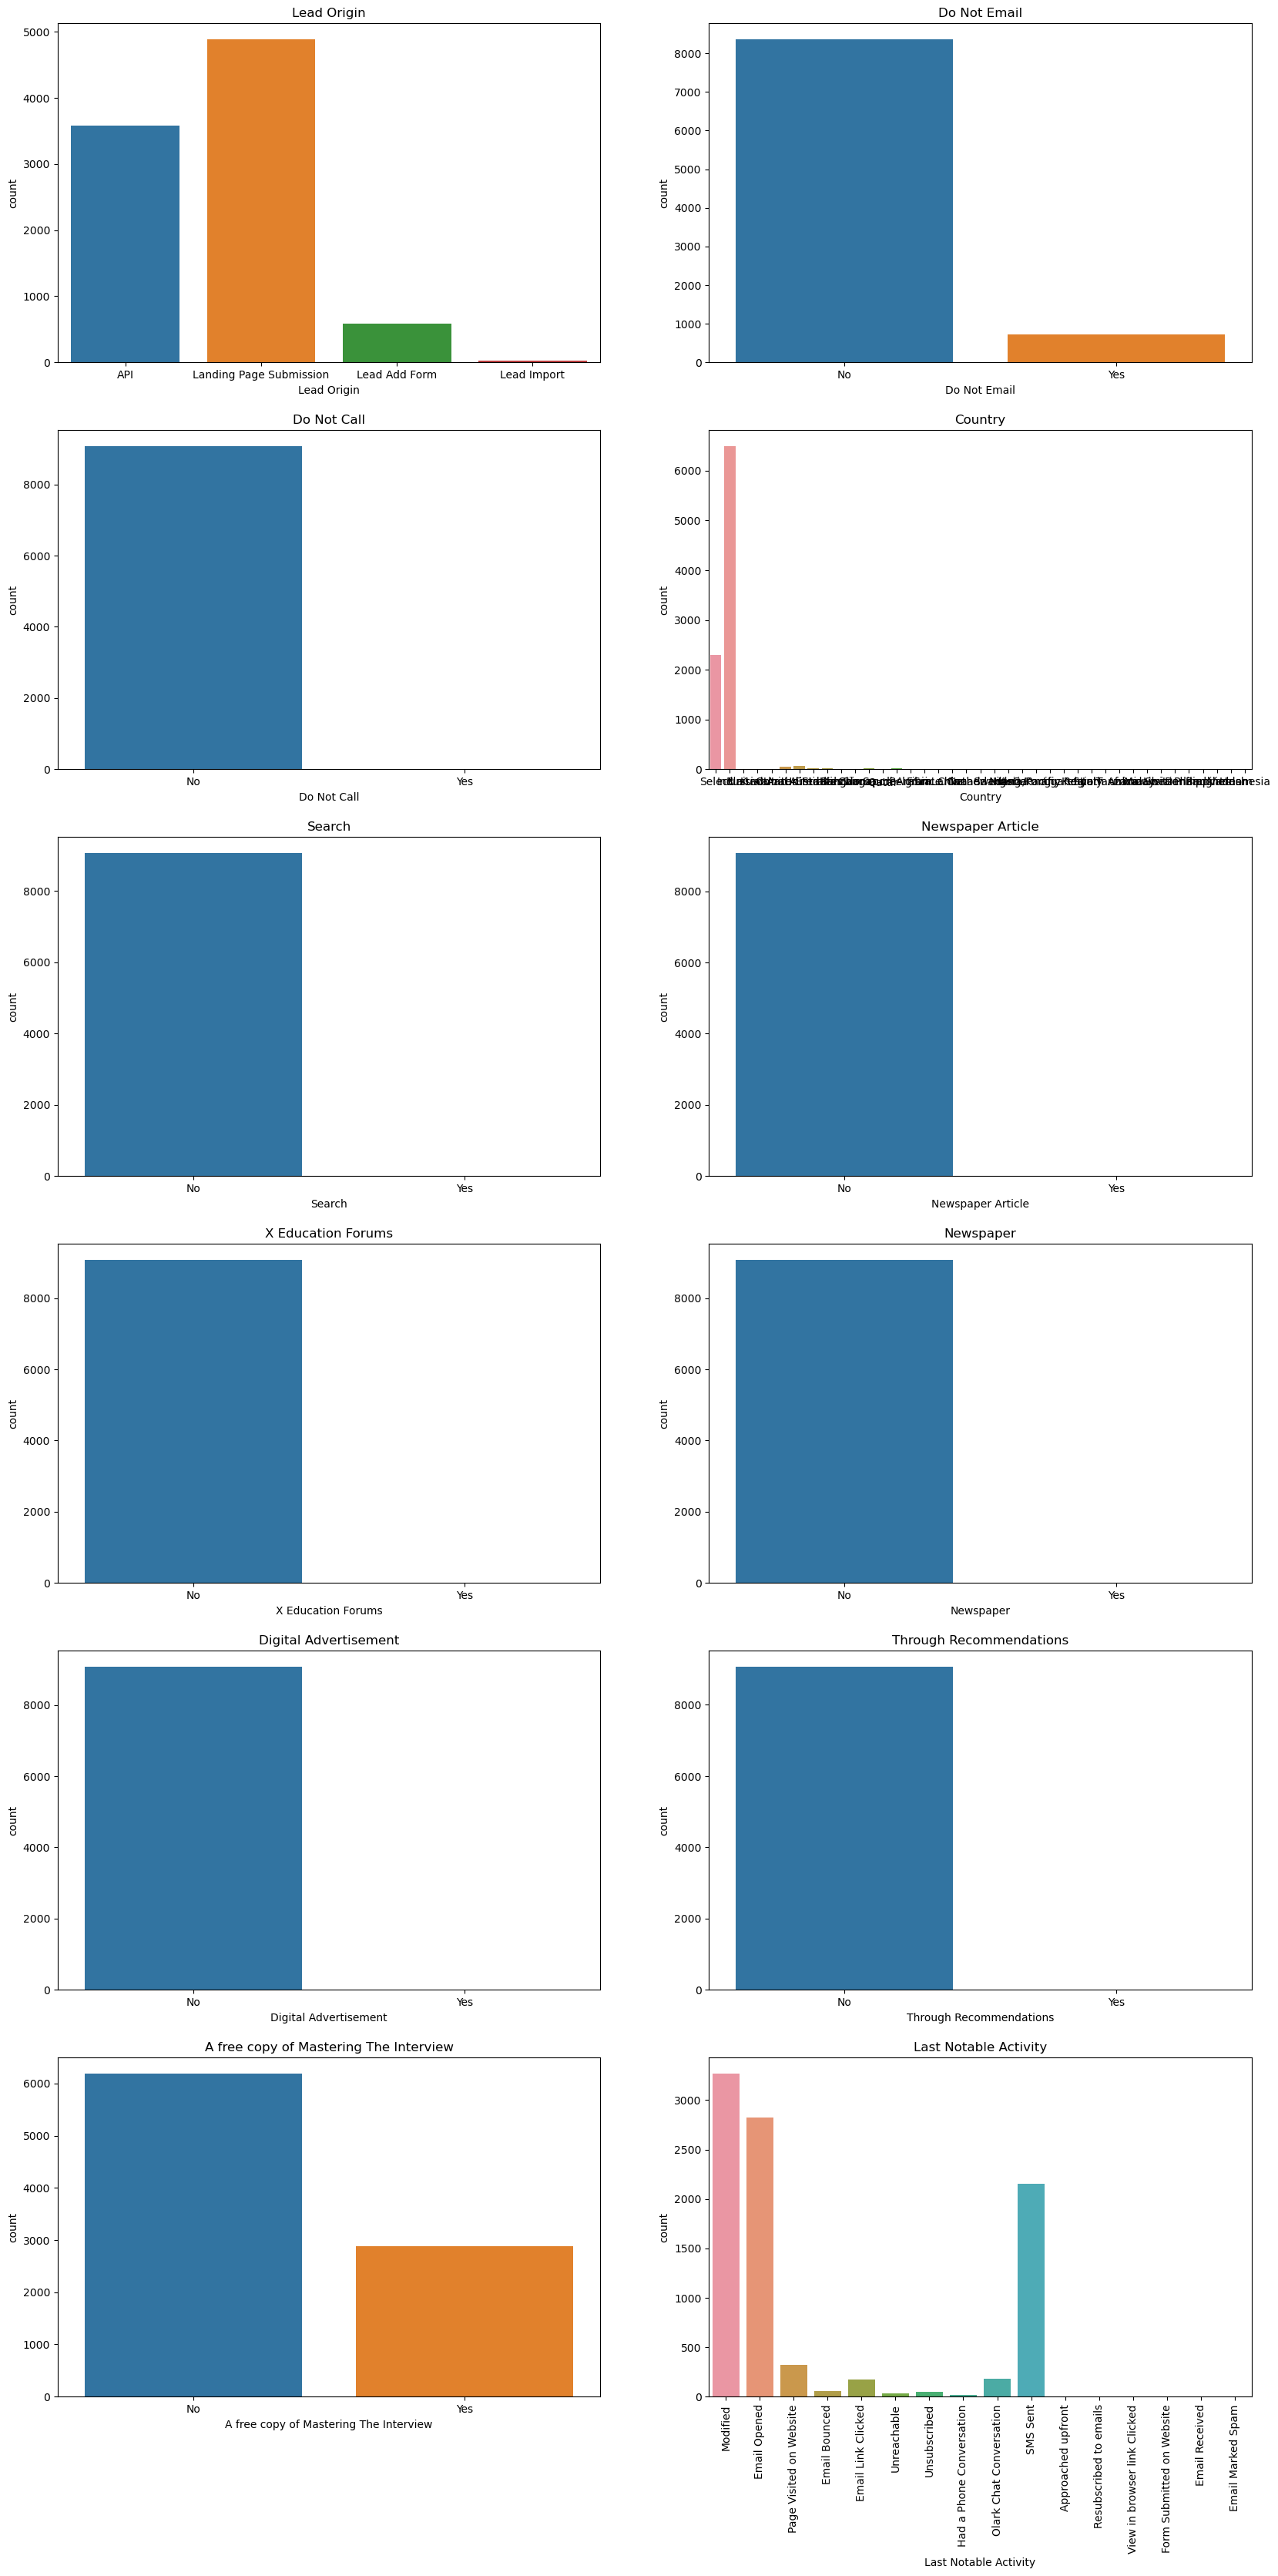

In [27]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x='Lead Origin', data=df1)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='Do Not Email', data=df1)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Call', data=df1)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x='Country',data=df1)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(x='Search', data=df1)
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(x='Newspaper Article', data=df1)
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x='X Education Forums', data=df1)
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x='Newspaper', data=df1)
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(x='Digital Advertisement', data=df1)
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x='Through Recommendations',data=df1)
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x='A free copy of Mastering The Interview', data=df1)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(x='Last Notable Activity', data=df1)
plt.xticks(rotation=90)
plt.title('Last Notable Activity')


plt.show()

## Encoding ( Conversion of Categorical / Object columns to Numeric values

In [28]:
# As we know datatypes for all column should be a number for creating a AI Model
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [29]:
# to know all (object and numerical both) distinct value counts of each columns
for i, cols in enumerate(df1.columns, start=1):
    print(i,':', cols, ":", df1[cols].nunique())

1 : Prospect ID : 9074
2 : Lead Number : 9074
3 : Lead Origin : 4
4 : Lead Source : 21
5 : Do Not Email : 2
6 : Do Not Call : 2
7 : Converted : 2
8 : TotalVisits : 41
9 : Total Time Spent on Website : 1717
10 : Page Views Per Visit : 114
11 : Last Activity : 17
12 : Country : 39
13 : Specialization : 19
14 : How did you hear about X Education : 10
15 : What is your current occupation : 7
16 : What matters most to you in choosing a course : 3
17 : Search : 2
18 : Magazine : 1
19 : Newspaper Article : 2
20 : X Education Forums : 2
21 : Newspaper : 2
22 : Digital Advertisement : 2
23 : Through Recommendations : 2
24 : Receive More Updates About Our Courses : 1
25 : Tags : 27
26 : Lead Quality : 5
27 : Update me on Supply Chain Content : 1
28 : Get updates on DM Content : 1
29 : Lead Profile : 6
30 : City : 7
31 : I agree to pay the amount through cheque : 1
32 : A free copy of Mastering The Interview : 2
33 : Last Notable Activity : 16


In [30]:
# to know distinct value counts of all object columns
# here we can find that which type of encoding we've to be perform in which object column

for cols in df1.columns:
    if df1[cols].dtype == 'object':  # Check if column dtype is 'object'
        print(cols, ":", df1[cols].nunique())   # Print index, column name, and number of unique values

Prospect ID : 9074
Lead Origin : 4
Lead Source : 21
Do Not Email : 2
Do Not Call : 2
Last Activity : 17
Country : 39
Specialization : 19
How did you hear about X Education : 10
What is your current occupation : 7
What matters most to you in choosing a course : 3
Search : 2
Magazine : 1
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
Receive More Updates About Our Courses : 1
Tags : 27
Lead Quality : 5
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
Lead Profile : 6
City : 7
I agree to pay the amount through cheque : 1
A free copy of Mastering The Interview : 2
Last Notable Activity : 16


#### **`distinct value of 2 are good contender for binary encoding (0 and 1)`**
#### **`distinct value of <10 are good contender for one-hot encoding or dummy variable creation`**
#### **`distinct value of >10 are good contender for frequency encoding`**

In [31]:
# let's start inspecting all elegible columns for binary encoding

In [32]:
df1['Do Not Email'].value_counts()

Do Not Email
No     8358
Yes     716
Name: count, dtype: int64

In [33]:
# df1['Do Not Email'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [34]:
# df1['Do Not Call'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [35]:
# df1['Search'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [36]:
# df1['Newspaper Article'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [37]:
# df1['X Education Forums'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [38]:
# df1['Newspaper'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [39]:
# df1['Digital Advertisement'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [40]:
# df1['Through Recommendations'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [41]:
# df1['A free copy of Mastering The Interview'].replace({'No':0,'Yes':1}, inplace=True)   #Replacing 'No' with 0 and 'Yes' with 1

In [42]:
# Replacing 'No' with 0 and 'Yes' with 1

bin = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview']

# creating a function for binary mapping
def binary_map(x):
    return x.map({'No':0,'Yes':1})

# Applying the function to the bin list
df1[bin] = df1[bin].apply(binary_map)

In [43]:
for cols in df1.columns:
    if df1[cols].dtype == 'object':
        print(cols, ":", df1[cols].nunique())

# distinct values of 2 have converted

Prospect ID : 9074
Lead Origin : 4
Lead Source : 21
Last Activity : 17
Country : 39
Specialization : 19
How did you hear about X Education : 10
What is your current occupation : 7
What matters most to you in choosing a course : 3
Magazine : 1
Receive More Updates About Our Courses : 1
Tags : 27
Lead Quality : 5
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
Lead Profile : 6
City : 7
I agree to pay the amount through cheque : 1
Last Notable Activity : 16


#### One-Hot Encoding (Dummy Variable Creation)

In [44]:
# As we know that count of distinct values less than 10 are applicable for dummy variable creation so now we need to encode these columns

dum = pd.get_dummies(df1[['Lead Origin','What is your current occupation','What matters most to you in choosing a course',
                         'Lead Quality','Lead Profile','City']], drop_first=True, dtype=int)

# 4-1=3
# 7-1=6
# 3-1=2
# 5-1=4
# 6-1=5
# 7-1=6
# 26 new columns will created

In [45]:
dum

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Select,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9238,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [46]:
# now concat df and newly created columns named dum to a new dataframe and call this newdf
newdf = pd.concat([df1, dum], axis=1)

In [47]:
newdf.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,1,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
# now drop these columns because we already created dummy valiables for these columns so we don't need this

newdf.drop(['Lead Origin','What is your current occupation','What matters most to you in choosing a course',
                         'Lead Quality','Lead Profile','City'],axis=1, inplace=True)

In [49]:
for cols in newdf.columns:
    if newdf[cols].dtype == 'object':
        print(cols, ":", newdf[cols].nunique())

# columns for the dummy valiable also converted

Prospect ID : 9074
Lead Source : 21
Last Activity : 17
Country : 39
Specialization : 19
How did you hear about X Education : 10
Magazine : 1
Receive More Updates About Our Courses : 1
Tags : 27
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
I agree to pay the amount through cheque : 1
Last Notable Activity : 16


In [50]:
# here we don't need that columns which has only 1 distinct value so we need to drop those

newdf.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1, inplace=True)

In [51]:
for cols in newdf.columns:
    if newdf[cols].dtype == 'object':
        print(cols, ":", newdf[cols].nunique())

# columns for one unique are droped

Prospect ID : 9074
Lead Source : 21
Last Activity : 17
Country : 39
Specialization : 19
How did you hear about X Education : 10
Tags : 27
Last Notable Activity : 16


In [52]:
# here Prospect ID isn't giving any valuable information so we can drop it too
newdf.drop('Prospect ID',axis=1, inplace=True)

In [53]:
for cols in newdf.columns:
    if newdf[cols].dtype == 'object':
        print(cols, ":", newdf[cols].nunique())

# missing Prospect ID

Lead Source : 21
Last Activity : 17
Country : 39
Specialization : 19
How did you hear about X Education : 10
Tags : 27
Last Notable Activity : 16


In [54]:
# Lead Source : 21
# Last Activity : 17
# Country : 39
# Specialization : 19
# How did you hear about X Education : 10
# Tags : 27
# Last Notable Activity : 16

# all these columns are applicable for frequency encoding

In [55]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Number                                                              9074 non-null   int64  
 1   Lead Source                                                              9074 non-null   object 
 2   Do Not Email                                                             9074 non-null   int64  
 3   Do Not Call                                                              9074 non-null   int64  
 4   Converted                                                                9074 non-null   int64  
 5   TotalVisits                                                              9074 non-null   float64
 6   Total Time Spent on Website                                              9074

In [56]:
# Elegible for Frequency Encoding

freq_encode = ['Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','Tags','Last Notable Activity']

In [57]:
# create a function to encode
def frequency_encoding(df, variables):
    # Create a copy of the dataframe to avoid modifying the original data
    df_encoded = newdf.copy()
    
    for var in variables:
        # Calculate the frequency of each category
        freq = newdf[var].value_counts(normalize=True)
        # Map the frequency to the original column
        df_encoded[var] = newdf[var].map(freq)
    
    return df_encoded

In [58]:
df = frequency_encoding(newdf, freq_encode)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Number                                                              9074 non-null   int64  
 1   Lead Source                                                              9074 non-null   float64
 2   Do Not Email                                                             9074 non-null   int64  
 3   Do Not Call                                                              9074 non-null   int64  
 4   Converted                                                                9074 non-null   int64  
 5   TotalVisits                                                              9074 non-null   float64
 6   Total Time Spent on Website                                              9074

### Devide Dataset into dependent and independent variables

In [60]:
X = df.drop("Converted",axis = 1)
y  = df[["Converted"]]

### train_test_split dataset

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [63]:
X_train.shape

(7259, 46)

In [64]:
X_test.shape

(1815, 46)

In [65]:
y_train.shape

(7259, 1)

In [66]:
y_test.shape

(1815, 1)

In [67]:
X_train2, X_train3, X_train4 = X_train, X_train, X_train

In [68]:
y_train2, y_train3, y_train4 = y_train, y_train, y_train

In [69]:
X_test2, X_test3, X_test4 = X_test, X_test, X_test

### Scalling the Dataset

In [70]:
from sklearn.preprocessing import MinMaxScaler

# instantiate
scaler = MinMaxScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Training the Data (with the appropriate alogorithm from the right family alogrithms)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [74]:
y_pred = knn.predict(X_test)

In [75]:
# Evaluation of the final model with right metrics ( Accuracy,Precision, Recall, f1-Score,Sensitivity, Specificity)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1144
           1       0.83      0.80      0.82       671

    accuracy                           0.87      1815
   macro avg       0.86      0.85      0.86      1815
weighted avg       0.87      0.87      0.87      1815



### Re iterate the whole process to get better model scores.

### trying with Different hyperparameter tuning

In [76]:
# Ideal Value of K can be determined by Hyperparameter tuning
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters 
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [77]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [78]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [79]:
# find the best score
g_res.best_score_

0.8994348574246352

In [80]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [81]:
# get a prediction
y_hat = knn.predict(X_train) # training accuracy
y_knn = knn.predict(X_test)  # testing accuracy

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_knn))

Training set accuracy:  0.9151398264223722
Test set accuracy:  0.8666666666666667


### Import RFE

In [88]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Instantiate and model fitting
dt = DecisionTreeClassifier()

In [90]:
rfe = RFE(estimator=dt, n_features_to_select=10, step=1)           # running RFE
rfe = rfe.fit(X_train2, y_train)

In [91]:
list(zip(X_train2.columns,rfe.ranking_))

[('Lead Number', 1),
 ('Lead Source', 3),
 ('Do Not Email', 10),
 ('Do Not Call', 22),
 ('TotalVisits', 2),
 ('Total Time Spent on Website', 1),
 ('Page Views Per Visit', 1),
 ('Last Activity', 1),
 ('Country', 16),
 ('Specialization', 1),
 ('How did you hear about X Education', 5),
 ('Search', 29),
 ('Newspaper Article', 31),
 ('X Education Forums', 21),
 ('Newspaper', 23),
 ('Digital Advertisement', 25),
 ('Through Recommendations', 34),
 ('Tags', 1),
 ('A free copy of Mastering The Interview', 7),
 ('Last Notable Activity', 1),
 ('Lead Origin_Landing Page Submission', 9),
 ('Lead Origin_Lead Add Form', 1),
 ('Lead Origin_Lead Import', 37),
 ('What is your current occupation_Housewife', 36),
 ('What is your current occupation_Other', 35),
 ('What is your current occupation_Select', 1),
 ('What is your current occupation_Student', 33),
 ('What is your current occupation_Unemployed', 15),
 ('What is your current occupation_Working Professional', 13),
 ('What matters most to you in choo

In [92]:
col = X_train2.columns[rfe.ranking_]

In [93]:
col

Index(['Lead Source', 'Do Not Call', 'How did you hear about X Education',
       'Lead Origin_Lead Import', 'Do Not Email', 'Lead Source', 'Lead Source',
       'Lead Source', 'Through Recommendations', 'Lead Source',
       'Total Time Spent on Website',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'Lead Quality_Low in Relevance', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Select', 'Lead Quality_Worst',
       'Lead Source', 'Last Activity', 'Lead Source', 'Specialization',
       'Lead Source', 'Lead Profile_Potential Lead',
       'Lead Profile_Other Leads', 'Lead Profile_Lateral Student',
       'Lead Source', 'Lead Quality_Not Sure', 'Digital Advertisement',
       'X Education Forums', 'What is your current occupation_Student',
       'What is your current occupation_Other',
       'A free copy of Mastering The Interview',
       'What is your current occupat

In [94]:
X_train2 = X_train2[col]

In [95]:
X_test2 = X_test2[col]

In [96]:
X_train2.shape

(7259, 46)

In [97]:
X_test2.shape

(1815, 46)

In [98]:
#model Fitting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train2,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [99]:
y_pred = knn.predict(X_test2)

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1144
           1       0.72      0.70      0.71       671

    accuracy                           0.79      1815
   macro avg       0.77      0.77      0.77      1815
weighted avg       0.79      0.79      0.79      1815

